In [15]:

import re

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import clean
import viz
import dvu

plt.style.use('default')
dvu.set_style()

df = pd.read_pickle('data/cdis_with_schemas.pkl')

In [16]:
df.head()

,medium_description_en,url,full_title_en,expert_name,short_title_en,short_description_en,disease_en,system_en,search_abbreviation_en,purpose_en,...,input_schema,content,cmeReleaseDate,dosing,seo,md5,related_calcs,created_at,updated_at,num_rules
0,Diagnoses delirium in older patients.,4-test-delirium-assessment,4 A’s Test for Delirium Screening,[],4AT,Delirium screening.,"[Delirium, Dementia]","[Neurologic, Psychiatric]","[4at, 4 As Test, 4as test, delirium screening,...",[Diagnosis],...,"[{'optional': False, 'default': 0, 'show_point...","{'reviewer': {'expert_name': []}, 'related_res...",None,False,{'meta_description_en': 'The 4 A’s Test for De...,24ae261c87f41784ca0beae2147dda0a,"[{'calcId': 3995, 'short_title_en': 'AMT-4', '...",NaN,NaN,4.0
1,Rules out PE based on clinical criteria.,4-level-pulmonary-embolism-clinical-probabilit...,4-Level Pulmonary Embolism Clinical Probabilit...,[],4PEPS Score for PE,Rules out PE.,"[Deep Venous Thrombosis, Pulmonary Embolism]","[Cardiac, Respiratory]",[4-Level Pulmonary Embolism Clinical Probabili...,"[Diagnosis, Rule Out]",...,"[{'label_en': 'Age', 'conditionality': '', 'de...",{'how_to_use': {'use_case_en': '<p>Do you use ...,None,False,{'meta_description_en': 'The 4-Level Pulmonary...,,"[{'calcId': 1750, 'short_title_en': 'Geneva Sc...",NaN,NaN,12.0
2,Predicts in-hospital mortality in patients adm...,4c-mortality-score-covid-19,4C Mortality Score for COVID-19,"[Miguel Reyes, MD , Arsalan Shawl, DO]",4C Mortality Score for COVID-19,In-hospital COVID-19 mortality.,"[COVID-19, Coronavirus]",[Respiratory],"[4C Mortality Score for COVID-19, 4C, 4C morta...",[Prognosis],...,"[{'type': 'radio', 'label_en': 'Age, years ', ...",{'how_to_use': {'use_case_en': '<p>Apply to ri...,None,False,{'meta_description_en': 'The 4C Mortality Scor...,,"[{'calcId': 10279, 'short_title_en': 'MuLBSTA ...",NaN,NaN,10.0
3,Differentiates patients with HIT from those wi...,4ts-score-heparin-induced-thrombocytopenia,4Ts Score for Heparin-Induced Thrombocytopenia,"[Calvin Hwang, MD]",4Ts for HIT,HIT vs other causes of thrombocytopenia.,"[Bleeding/Hemorrhage, Thrombocytopenia]",[Hematologic],"[plt, HIT]",[Diagnosis],...,"[{'default': 2, 'label_en': 'Thrombocytopenia'...","{'about': {'evidence_based_medicine_en': '', '...",NaN,False,{'meta_description_en': 'The 4Ts Score is a cl...,0483d560043c355df74af2ff2c3337b7,"[{'calcId': 1789, 'short_title_en': 'HIT Exper...",NaN,NaN,4.0
4,Calculates reference values for distance walke...,6-minute-walk-distance,6 Minute Walk Distance,[],6 Minute Walk Distance,Functional status.,"[CHF, Chronic Pain, Congestive Heart Failure, ...",[Any/All],"[6MWD, walking, six minute, functional status]",[Formula],...,"[{'type': 'toggle', 'label_en': 'Sex', 'name':...","{'how_to_use': {'use_case_en': '', 'pearls_pit...",NaN,False,{'meta_description_en': 'The 6 Minute Walk Dis...,9e1022e778dabfcc554ce1042961b6b2,"[{'calcId': 10161, 'short_title_en': 'COPD Ass...",NaN,NaN,5.0


**Get feature names as list**

In [27]:
def get_feature_names_list(schema):
    if isinstance(schema, list):
        return [clean_feature_name(s['label_en']) if 'label_en' in s else 'unknown'
                for s in schema]
    else:
        return []
df['feature_names'] = df['input_schema'].apply(get_feature_names_list)

**Clean the feature names**

In [28]:
words = df['feature_names'].apply(clean.clean_feature_names_list)
all_words = sum(words, [])  # concatenate all list

all_words = pd.Series(all_words)
all_words = all_words[~(all_words == 'unknown')]
counts = all_words.value_counts()

In [29]:
feat_names = pd.Series(counts.index).apply(lambda x: x[:39])
for feat_name in sorted(feat_names):
    print(feat_name)
# print(sorted(feat_names))


 >1 extranodal site
 Age at diagnosis, years (A)
 HLA match group
 Hemophagocytosis features on bone marr
 Motor response
 Pupil response
% alcohol
% bands
% basophils
% myeloblasts in peripheral blood
% neutrophils
% of reticulocytes
&ge;2 sites of metastasis
&gt;3 hrs from symptom onset (or last t
0.45% saline
0.9% saline
1. Anxious mood: Worries, anticipation 
1. Felt low in spirits or sad?
1. I have been less alert.
1. Sleep onset insomnia:
10 . Respiratory symptoms: Pressure or 
10. Concentration/decision making:
10. Dysarthria
10. I have had trouble maintaining phys
100 mEq NaHCO₃ in 1L D5W
10: Dysarthria
10a. Suffered from reduced appetite?
10b. Suffered from increased appetite?
11. Extinction and inattention
11. Gastrointestinal symptoms: Difficul
11. I have had difficulty making decisi
11. Outlook (self):
11: Extinction/inattention
11: Test extinction/inattention/neglect
12. Genitourinary symptoms: Frequency o
12. I have been less motivated to do an
12. Suicidal ideation:
13.

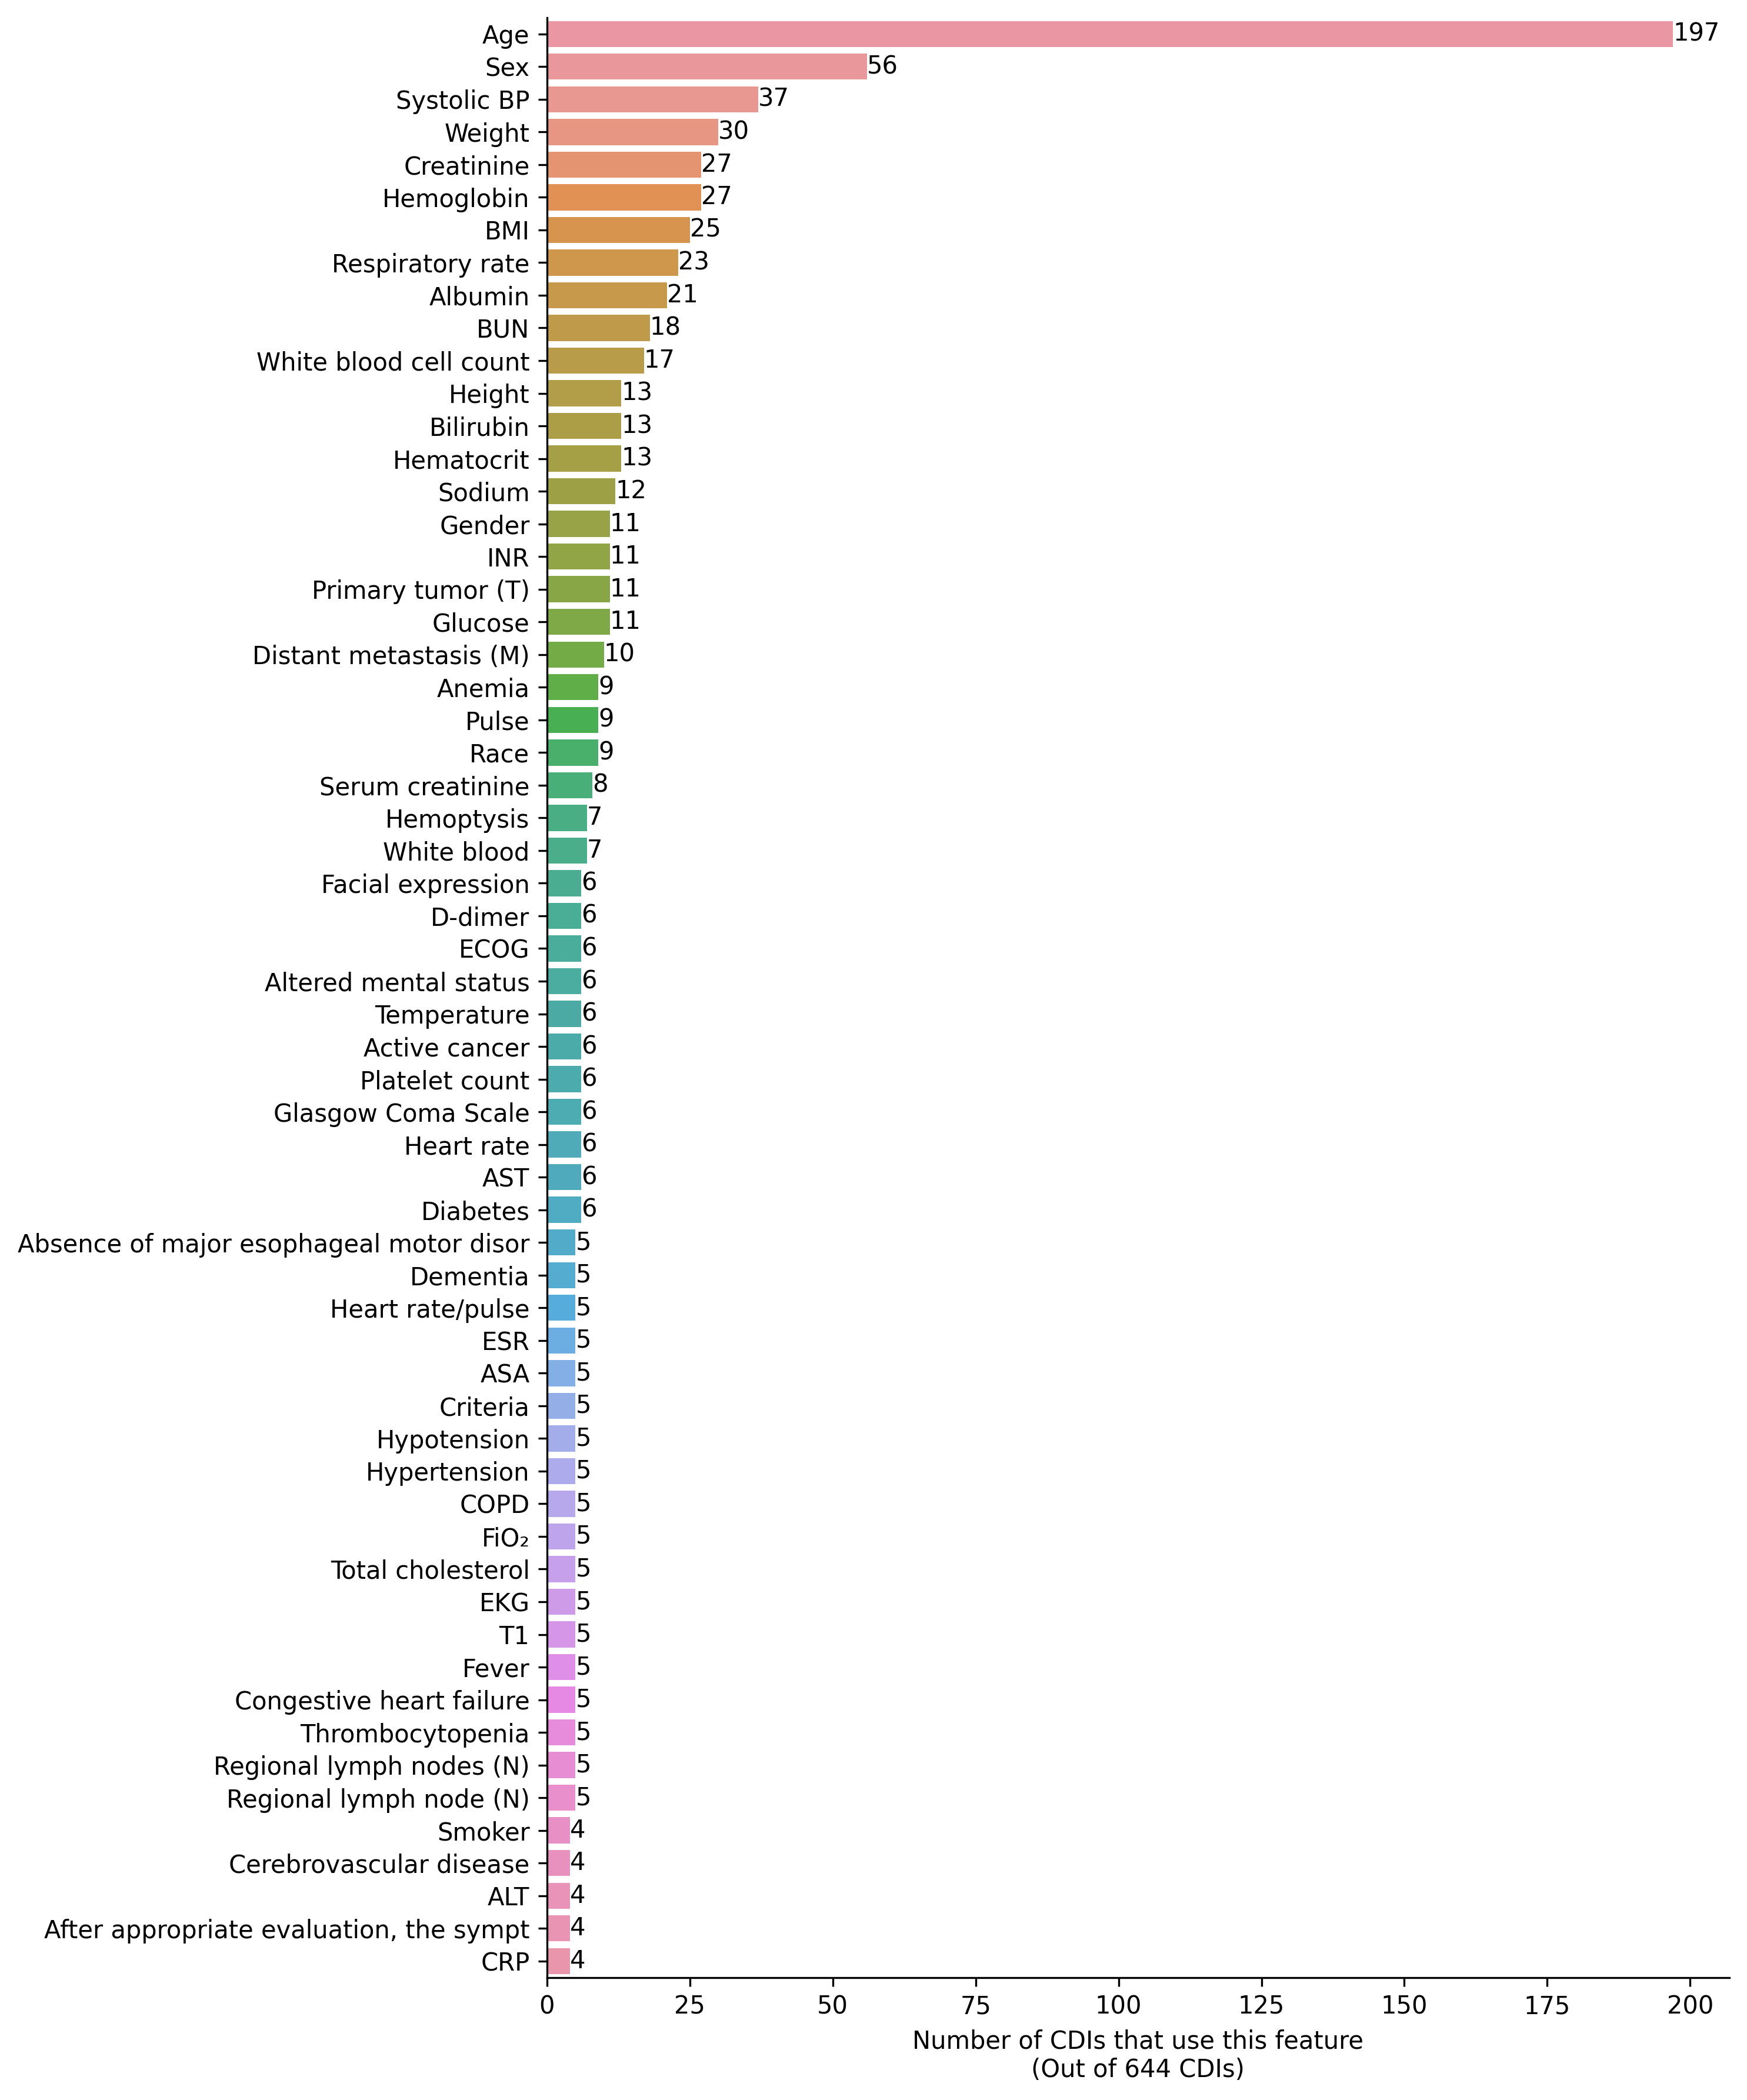

In [30]:
plt.figure(figsize=(10, 12), dpi=300, facecolor='w')
N = 60
# plt.grid()
ax = sns.barplot(y=feat_names[:N],
                 x=counts.values[:N], orient='h')
ax.bar_label(ax.containers[0])
plt.xlabel(f'Number of CDIs that use this feature\n(Out of {df.shape[0]} CDIs)')
plt.tight_layout()
viz.savefig('common_features')